<a href="https://colab.research.google.com/github/anuragiiser/SS4201-project/blob/main/SS4202_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/SS4202/dataset.csv')

In [ ]:
df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
df['Spectral Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [ ]:
df['Star type'].unique()

array([0, 1, 2, 3, 4, 5])

In [ ]:
y=df['Star type']
x=df.drop(['Star type'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
list_1=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_s=knn.predict(x_test)
    scores=accuracy_score(y_test,pred_s)
    list_1.append(scores)

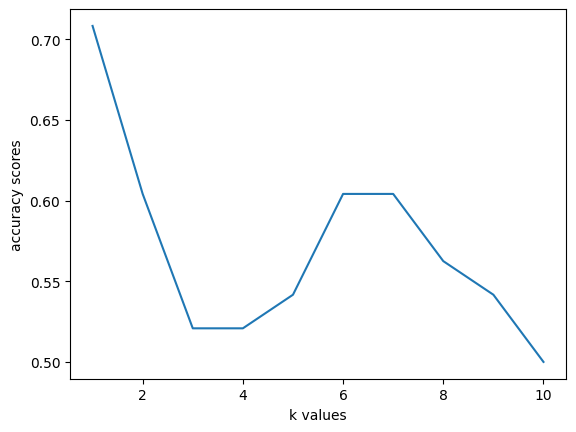

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),list_1)
plt.xlabel('k values')
plt.ylabel('accuracy scores')
plt.show()

In [ ]:
print(max(list_1))

0.7083333333333334


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)

In [ ]:
lr.fit(x_train,y_train)
pred_1=lr.predict(x_test)
score_1=accuracy_score(y_test,pred_1)

In [ ]:
score_1

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)
pred_2=rfc.predict(x_test)
score_2=accuracy_score(y_test,pred_2)

In [ ]:
score_2

0.9791666666666666

In [ ]:
from sklearn.svm import SVC
svm=SVC()

In [ ]:
svm.fit(x_train,y_train)
pred_3=svm.predict(x_test)
score_3=accuracy_score(y_test,pred_3)

In [ ]:
score_3

0.3333333333333333

from all the classifiers used logistic regression and random forest gives the highest accuracy scores

In [ ]:
new_df=pd.DataFrame({'actual':y_test,
                    'predictions':pred_2})

In [ ]:
new_df

,actual,predictions
109,4,4
71,1,1
37,3,3
74,1,1
108,4,4
227,4,4
156,3,3
220,4,4
152,3,3
194,1,1
